In [67]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib as imp
import datacleaner
import datetime
imp.reload(datacleaner)

from datacleaner import *

In [68]:
np.random.seed(1)
tf.keras.backend.clear_session()

bd = pd.read_csv(r"USAccDeaths.csv")
bd.pop("Unnamed: 0")
bd

,time,value
0,1973.000000,9007
1,1973.083333,8106
2,1973.166667,8928
3,1973.250000,9137
4,1973.333333,10017
...,...,...
67,1978.583333,9827
68,1978.666667,9110
69,1978.750000,9070
70,1978.833333,8633


<AxesSubplot:xlabel='time'>

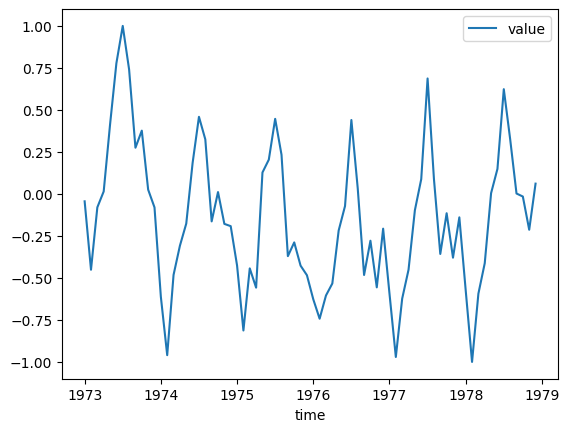

In [69]:
bd.index = bd["time"]
bd.pop("time")
bd["value"]=MinMaxScaler(feature_range=(-1,1)).fit_transform(bd.values)
bd.plot()

In [70]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [71]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(bd, WINDOW_SIZE)
X1.shape, y1.shape

((67, 5, 1, 1), (67, 1))

In [72]:
X_train1, y_train1 = X1[:55], y1[:55]
X_val1, y_val1 = X1[55:60], y1[55:60]
X_test1, y_test1 = X1[60:], y1[60:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((55, 5, 1, 1), (55, 1), (5, 5, 1, 1), (5, 1), (7, 5, 1, 1), (7, 1))

In [73]:
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(LSTM(64))
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [74]:
cp1 = ModelCheckpoint('modelNossoLSTM/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [75]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=100, callbacks=[cp1])

Epoch 1/100
1/2 [==============>...............] - ETA: 1s - loss: 0.2338 - root_mean_squared_error: 0.4836

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 5s 3s/step - loss: 0.2090 - root_mean_squared_error: 0.4572 - val_loss: 0.3456 - val_root_mean_squared_error: 0.5879
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2099 - root_mean_squared_error: 0.4582

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.2083 - root_mean_squared_error: 0.4564 - val_loss: 0.3430 - val_root_mean_squared_error: 0.5857
Epoch 3/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2174 - root_mean_squared_error: 0.4663

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.2074 - root_mean_squared_error: 0.4555 - val_loss: 0.3406 - val_root_mean_squared_error: 0.5836
Epoch 4/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1529 - root_mean_squared_error: 0.3911

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.2067 - root_mean_squared_error: 0.4547 - val_loss: 0.3382 - val_root_mean_squared_error: 0.5815
Epoch 5/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2298 - root_mean_squared_error: 0.4793

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.2061 - root_mean_squared_error: 0.4540 - val_loss: 0.3358 - val_root_mean_squared_error: 0.5795
Epoch 6/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1980 - root_mean_squared_error: 0.4450

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 2s 2s/step - loss: 0.2052 - root_mean_squared_error: 0.4530 - val_loss: 0.3336 - val_root_mean_squared_error: 0.5776
Epoch 7/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2510 - root_mean_squared_error: 0.5010

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.2045 - root_mean_squared_error: 0.4523 - val_loss: 0.3313 - val_root_mean_squared_error: 0.5756
Epoch 8/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2435 - root_mean_squared_error: 0.4935

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 2s 2s/step - loss: 0.2039 - root_mean_squared_error: 0.4515 - val_loss: 0.3290 - val_root_mean_squared_error: 0.5735
Epoch 9/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1698 - root_mean_squared_error: 0.4120

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 2s 2s/step - loss: 0.2031 - root_mean_squared_error: 0.4506 - val_loss: 0.3267 - val_root_mean_squared_error: 0.5715
Epoch 10/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1898 - root_mean_squared_error: 0.4356

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.2024 - root_mean_squared_error: 0.4499 - val_loss: 0.3244 - val_root_mean_squared_error: 0.5695
Epoch 11/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1619 - root_mean_squared_error: 0.4024

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.2015 - root_mean_squared_error: 0.4489 - val_loss: 0.3223 - val_root_mean_squared_error: 0.5677
Epoch 12/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2502 - root_mean_squared_error: 0.5002

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.2009 - root_mean_squared_error: 0.4482 - val_loss: 0.3202 - val_root_mean_squared_error: 0.5658
Epoch 13/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1546 - root_mean_squared_error: 0.3932

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.2000 - root_mean_squared_error: 0.4472 - val_loss: 0.3181 - val_root_mean_squared_error: 0.5640
Epoch 14/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1839 - root_mean_squared_error: 0.4289

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1992 - root_mean_squared_error: 0.4464 - val_loss: 0.3160 - val_root_mean_squared_error: 0.5621
Epoch 15/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1919 - root_mean_squared_error: 0.4381

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1987 - root_mean_squared_error: 0.4457 - val_loss: 0.3140 - val_root_mean_squared_error: 0.5604
Epoch 16/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2158 - root_mean_squared_error: 0.4645

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1979 - root_mean_squared_error: 0.4449 - val_loss: 0.3122 - val_root_mean_squared_error: 0.5587
Epoch 17/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2043 - root_mean_squared_error: 0.4520

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1973 - root_mean_squared_error: 0.4442 - val_loss: 0.3104 - val_root_mean_squared_error: 0.5571
Epoch 18/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1802 - root_mean_squared_error: 0.4245

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1967 - root_mean_squared_error: 0.4435 - val_loss: 0.3087 - val_root_mean_squared_error: 0.5556
Epoch 19/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1998 - root_mean_squared_error: 0.4470

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1961 - root_mean_squared_error: 0.4429 - val_loss: 0.3071 - val_root_mean_squared_error: 0.5541
Epoch 20/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1968 - root_mean_squared_error: 0.4436

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1956 - root_mean_squared_error: 0.4423 - val_loss: 0.3055 - val_root_mean_squared_error: 0.5527
Epoch 21/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1827 - root_mean_squared_error: 0.4275

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1951 - root_mean_squared_error: 0.4417 - val_loss: 0.3039 - val_root_mean_squared_error: 0.5512
Epoch 22/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1895 - root_mean_squared_error: 0.4353

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1946 - root_mean_squared_error: 0.4412 - val_loss: 0.3023 - val_root_mean_squared_error: 0.5498
Epoch 23/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1639 - root_mean_squared_error: 0.4049

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1941 - root_mean_squared_error: 0.4406 - val_loss: 0.3008 - val_root_mean_squared_error: 0.5485
Epoch 24/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1719 - root_mean_squared_error: 0.4146

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1936 - root_mean_squared_error: 0.4400 - val_loss: 0.2994 - val_root_mean_squared_error: 0.5472
Epoch 25/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2127 - root_mean_squared_error: 0.4612

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1931 - root_mean_squared_error: 0.4394 - val_loss: 0.2980 - val_root_mean_squared_error: 0.5459
Epoch 26/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1757 - root_mean_squared_error: 0.4191

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1926 - root_mean_squared_error: 0.4389 - val_loss: 0.2965 - val_root_mean_squared_error: 0.5445
Epoch 27/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1929 - root_mean_squared_error: 0.4392

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1922 - root_mean_squared_error: 0.4384 - val_loss: 0.2951 - val_root_mean_squared_error: 0.5432
Epoch 28/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1987 - root_mean_squared_error: 0.4457

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1917 - root_mean_squared_error: 0.4378 - val_loss: 0.2937 - val_root_mean_squared_error: 0.5419
Epoch 29/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2215 - root_mean_squared_error: 0.4706

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1912 - root_mean_squared_error: 0.4372 - val_loss: 0.2923 - val_root_mean_squared_error: 0.5407
Epoch 30/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1971 - root_mean_squared_error: 0.4440

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1907 - root_mean_squared_error: 0.4366 - val_loss: 0.2910 - val_root_mean_squared_error: 0.5394
Epoch 31/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2348 - root_mean_squared_error: 0.4846

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1902 - root_mean_squared_error: 0.4361 - val_loss: 0.2897 - val_root_mean_squared_error: 0.5382
Epoch 32/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2048 - root_mean_squared_error: 0.4526

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1897 - root_mean_squared_error: 0.4356 - val_loss: 0.2883 - val_root_mean_squared_error: 0.5370
Epoch 33/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2444 - root_mean_squared_error: 0.4944

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1893 - root_mean_squared_error: 0.4351 - val_loss: 0.2870 - val_root_mean_squared_error: 0.5357
Epoch 34/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1994 - root_mean_squared_error: 0.4465

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1888 - root_mean_squared_error: 0.4345 - val_loss: 0.2858 - val_root_mean_squared_error: 0.5346
Epoch 35/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1909 - root_mean_squared_error: 0.4370

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1884 - root_mean_squared_error: 0.4340 - val_loss: 0.2844 - val_root_mean_squared_error: 0.5333
Epoch 36/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2038 - root_mean_squared_error: 0.4514

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1879 - root_mean_squared_error: 0.4335 - val_loss: 0.2832 - val_root_mean_squared_error: 0.5322
Epoch 37/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1945 - root_mean_squared_error: 0.4410

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1874 - root_mean_squared_error: 0.4329 - val_loss: 0.2821 - val_root_mean_squared_error: 0.5311
Epoch 38/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2156 - root_mean_squared_error: 0.4643

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1870 - root_mean_squared_error: 0.4324 - val_loss: 0.2808 - val_root_mean_squared_error: 0.5299
Epoch 39/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1366 - root_mean_squared_error: 0.3695

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1866 - root_mean_squared_error: 0.4319 - val_loss: 0.2796 - val_root_mean_squared_error: 0.5288
Epoch 40/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1941 - root_mean_squared_error: 0.4405

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1861 - root_mean_squared_error: 0.4314 - val_loss: 0.2784 - val_root_mean_squared_error: 0.5276
Epoch 41/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1987 - root_mean_squared_error: 0.4457

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1857 - root_mean_squared_error: 0.4309 - val_loss: 0.2772 - val_root_mean_squared_error: 0.5265
Epoch 42/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1600 - root_mean_squared_error: 0.4001

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1852 - root_mean_squared_error: 0.4303 - val_loss: 0.2761 - val_root_mean_squared_error: 0.5255
Epoch 43/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2257 - root_mean_squared_error: 0.4751

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1848 - root_mean_squared_error: 0.4299 - val_loss: 0.2749 - val_root_mean_squared_error: 0.5243
Epoch 44/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1713 - root_mean_squared_error: 0.4139

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1844 - root_mean_squared_error: 0.4294 - val_loss: 0.2737 - val_root_mean_squared_error: 0.5232
Epoch 45/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1775 - root_mean_squared_error: 0.4213

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1839 - root_mean_squared_error: 0.4288 - val_loss: 0.2726 - val_root_mean_squared_error: 0.5221
Epoch 46/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1938 - root_mean_squared_error: 0.4403

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1835 - root_mean_squared_error: 0.4283 - val_loss: 0.2714 - val_root_mean_squared_error: 0.5210
Epoch 47/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2426 - root_mean_squared_error: 0.4926

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1830 - root_mean_squared_error: 0.4278 - val_loss: 0.2703 - val_root_mean_squared_error: 0.5199
Epoch 48/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1761 - root_mean_squared_error: 0.4197

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1826 - root_mean_squared_error: 0.4273 - val_loss: 0.2692 - val_root_mean_squared_error: 0.5188
Epoch 49/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2020 - root_mean_squared_error: 0.4495

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1821 - root_mean_squared_error: 0.4268 - val_loss: 0.2679 - val_root_mean_squared_error: 0.5176
Epoch 50/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1819 - root_mean_squared_error: 0.4265

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1816 - root_mean_squared_error: 0.4262 - val_loss: 0.2668 - val_root_mean_squared_error: 0.5165
Epoch 51/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2032 - root_mean_squared_error: 0.4507

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1812 - root_mean_squared_error: 0.4257 - val_loss: 0.2656 - val_root_mean_squared_error: 0.5153
Epoch 52/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2066 - root_mean_squared_error: 0.4545

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1808 - root_mean_squared_error: 0.4252 - val_loss: 0.2644 - val_root_mean_squared_error: 0.5142
Epoch 53/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1785 - root_mean_squared_error: 0.4224

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1803 - root_mean_squared_error: 0.4246 - val_loss: 0.2632 - val_root_mean_squared_error: 0.5130
Epoch 54/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1304 - root_mean_squared_error: 0.3612

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1798 - root_mean_squared_error: 0.4240 - val_loss: 0.2620 - val_root_mean_squared_error: 0.5119
Epoch 55/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1545 - root_mean_squared_error: 0.3930

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1793 - root_mean_squared_error: 0.4234 - val_loss: 0.2608 - val_root_mean_squared_error: 0.5107
Epoch 56/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2109 - root_mean_squared_error: 0.4592

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1788 - root_mean_squared_error: 0.4228 - val_loss: 0.2597 - val_root_mean_squared_error: 0.5096
Epoch 57/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2075 - root_mean_squared_error: 0.4555

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1782 - root_mean_squared_error: 0.4222 - val_loss: 0.2585 - val_root_mean_squared_error: 0.5084
Epoch 58/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1734 - root_mean_squared_error: 0.4164

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1776 - root_mean_squared_error: 0.4215 - val_loss: 0.2574 - val_root_mean_squared_error: 0.5073
Epoch 59/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1569 - root_mean_squared_error: 0.3961

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1771 - root_mean_squared_error: 0.4209 - val_loss: 0.2561 - val_root_mean_squared_error: 0.5061
Epoch 60/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1520 - root_mean_squared_error: 0.3899

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1766 - root_mean_squared_error: 0.4202 - val_loss: 0.2549 - val_root_mean_squared_error: 0.5049
Epoch 61/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2084 - root_mean_squared_error: 0.4565

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1760 - root_mean_squared_error: 0.4196 - val_loss: 0.2537 - val_root_mean_squared_error: 0.5037
Epoch 62/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1707 - root_mean_squared_error: 0.4132

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1754 - root_mean_squared_error: 0.4188 - val_loss: 0.2525 - val_root_mean_squared_error: 0.5025
Epoch 63/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1777 - root_mean_squared_error: 0.4215

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1748 - root_mean_squared_error: 0.4181 - val_loss: 0.2515 - val_root_mean_squared_error: 0.5015
Epoch 64/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1750 - root_mean_squared_error: 0.4183

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1741 - root_mean_squared_error: 0.4173 - val_loss: 0.2505 - val_root_mean_squared_error: 0.5005
Epoch 65/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1901 - root_mean_squared_error: 0.4360

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1735 - root_mean_squared_error: 0.4165 - val_loss: 0.2495 - val_root_mean_squared_error: 0.4995
Epoch 66/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1911 - root_mean_squared_error: 0.4371

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1728 - root_mean_squared_error: 0.4157 - val_loss: 0.2486 - val_root_mean_squared_error: 0.4986
Epoch 67/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1687 - root_mean_squared_error: 0.4107

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1721 - root_mean_squared_error: 0.4148 - val_loss: 0.2477 - val_root_mean_squared_error: 0.4977
Epoch 68/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2005 - root_mean_squared_error: 0.4478

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1714 - root_mean_squared_error: 0.4140 - val_loss: 0.2467 - val_root_mean_squared_error: 0.4967
Epoch 69/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2181 - root_mean_squared_error: 0.4670

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1708 - root_mean_squared_error: 0.4132 - val_loss: 0.2458 - val_root_mean_squared_error: 0.4958
Epoch 70/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1888 - root_mean_squared_error: 0.4345

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1701 - root_mean_squared_error: 0.4124 - val_loss: 0.2449 - val_root_mean_squared_error: 0.4949
Epoch 71/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1381 - root_mean_squared_error: 0.3716

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1695 - root_mean_squared_error: 0.4117 - val_loss: 0.2441 - val_root_mean_squared_error: 0.4941
Epoch 72/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2018 - root_mean_squared_error: 0.4492

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1690 - root_mean_squared_error: 0.4111 - val_loss: 0.2434 - val_root_mean_squared_error: 0.4934
Epoch 73/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1861 - root_mean_squared_error: 0.4313

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1684 - root_mean_squared_error: 0.4104 - val_loss: 0.2426 - val_root_mean_squared_error: 0.4925
Epoch 74/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1594 - root_mean_squared_error: 0.3993

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1678 - root_mean_squared_error: 0.4096 - val_loss: 0.2419 - val_root_mean_squared_error: 0.4918
Epoch 75/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1744 - root_mean_squared_error: 0.4176

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1673 - root_mean_squared_error: 0.4090 - val_loss: 0.2410 - val_root_mean_squared_error: 0.4909
Epoch 76/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1168 - root_mean_squared_error: 0.3418

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1667 - root_mean_squared_error: 0.4083 - val_loss: 0.2401 - val_root_mean_squared_error: 0.4900
Epoch 77/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1838 - root_mean_squared_error: 0.4287

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1663 - root_mean_squared_error: 0.4078 - val_loss: 0.2390 - val_root_mean_squared_error: 0.4889
Epoch 78/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1699 - root_mean_squared_error: 0.4121

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1658 - root_mean_squared_error: 0.4071 - val_loss: 0.2379 - val_root_mean_squared_error: 0.4877
Epoch 79/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1854 - root_mean_squared_error: 0.4306

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1653 - root_mean_squared_error: 0.4065 - val_loss: 0.2367 - val_root_mean_squared_error: 0.4865
Epoch 80/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1539 - root_mean_squared_error: 0.3924

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1647 - root_mean_squared_error: 0.4059 - val_loss: 0.2355 - val_root_mean_squared_error: 0.4853
Epoch 81/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1284 - root_mean_squared_error: 0.3584

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1642 - root_mean_squared_error: 0.4053 - val_loss: 0.2343 - val_root_mean_squared_error: 0.4841
Epoch 82/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1443 - root_mean_squared_error: 0.3798

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1638 - root_mean_squared_error: 0.4047 - val_loss: 0.2331 - val_root_mean_squared_error: 0.4828
Epoch 83/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1999 - root_mean_squared_error: 0.4471

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1633 - root_mean_squared_error: 0.4041 - val_loss: 0.2320 - val_root_mean_squared_error: 0.4817
Epoch 84/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1446 - root_mean_squared_error: 0.3802

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1627 - root_mean_squared_error: 0.4034 - val_loss: 0.2312 - val_root_mean_squared_error: 0.4808
Epoch 85/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1565 - root_mean_squared_error: 0.3956

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1622 - root_mean_squared_error: 0.4028 - val_loss: 0.2303 - val_root_mean_squared_error: 0.4799
Epoch 86/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1849 - root_mean_squared_error: 0.4300

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1618 - root_mean_squared_error: 0.4022 - val_loss: 0.2292 - val_root_mean_squared_error: 0.4788
Epoch 87/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2148 - root_mean_squared_error: 0.4634

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1613 - root_mean_squared_error: 0.4016 - val_loss: 0.2282 - val_root_mean_squared_error: 0.4777
Epoch 88/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1544 - root_mean_squared_error: 0.3929

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1608 - root_mean_squared_error: 0.4010 - val_loss: 0.2271 - val_root_mean_squared_error: 0.4766
Epoch 89/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1593 - root_mean_squared_error: 0.3991

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1602 - root_mean_squared_error: 0.4003 - val_loss: 0.2260 - val_root_mean_squared_error: 0.4754
Epoch 90/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1058 - root_mean_squared_error: 0.3252

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1598 - root_mean_squared_error: 0.3998 - val_loss: 0.2249 - val_root_mean_squared_error: 0.4742
Epoch 91/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1785 - root_mean_squared_error: 0.4225

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1593 - root_mean_squared_error: 0.3992 - val_loss: 0.2238 - val_root_mean_squared_error: 0.4731
Epoch 92/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1417 - root_mean_squared_error: 0.3764

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1588 - root_mean_squared_error: 0.3985 - val_loss: 0.2227 - val_root_mean_squared_error: 0.4719
Epoch 93/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1559 - root_mean_squared_error: 0.3948

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1583 - root_mean_squared_error: 0.3979 - val_loss: 0.2217 - val_root_mean_squared_error: 0.4708
Epoch 94/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1756 - root_mean_squared_error: 0.4190

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1579 - root_mean_squared_error: 0.3973 - val_loss: 0.2206 - val_root_mean_squared_error: 0.4697
Epoch 95/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1623 - root_mean_squared_error: 0.4028

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1574 - root_mean_squared_error: 0.3968 - val_loss: 0.2196 - val_root_mean_squared_error: 0.4686
Epoch 96/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1373 - root_mean_squared_error: 0.3705

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1569 - root_mean_squared_error: 0.3961 - val_loss: 0.2186 - val_root_mean_squared_error: 0.4676
Epoch 97/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1729 - root_mean_squared_error: 0.4158

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1564 - root_mean_squared_error: 0.3955 - val_loss: 0.2178 - val_root_mean_squared_error: 0.4667
Epoch 98/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1200 - root_mean_squared_error: 0.3464

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1559 - root_mean_squared_error: 0.3949 - val_loss: 0.2170 - val_root_mean_squared_error: 0.4659
Epoch 99/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1591 - root_mean_squared_error: 0.3988

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1555 - root_mean_squared_error: 0.3943 - val_loss: 0.2162 - val_root_mean_squared_error: 0.4650
Epoch 100/100
1/2 [==============>...............] - ETA: 0s - loss: 0.1673 - root_mean_squared_error: 0.4090

INFO:tensorflow:Assets written to: modelNossoLSTM\assets


INFO:tensorflow:Assets written to: modelNossoLSTM\assets


2/2 [==============================] - 3s 3s/step - loss: 0.1550 - root_mean_squared_error: 0.3937 - val_loss: 0.2152 - val_root_mean_squared_error: 0.4639


In [76]:
from tensorflow.keras.models import load_model
model2 = load_model('modelNossoLSTM/')

In [77]:
train_predictions = model2.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

2/2 [==============================] - 0s 2ms/step


ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model2.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
test_predictions = model2.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])

In [ ]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

In [ ]:
plot_predictions1(model1, X_test1, y_test1)